In [36]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [389]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis =1)
y = diabetes_df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 32,stratify = y)

#sc = MinMaxScaler()
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.fit_transform(X_test)

In [390]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state= 32)
X_resampled, y_resampled = ros.fit_resample(X_train_Scaled, y_train)

In [408]:
#decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 6, random_state = 32)

In [409]:
model = model.fit(X_resampled,y_resampled)
y_pred = model.predict(X_test_Scaled)

In [410]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       150
           1       0.61      0.70      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



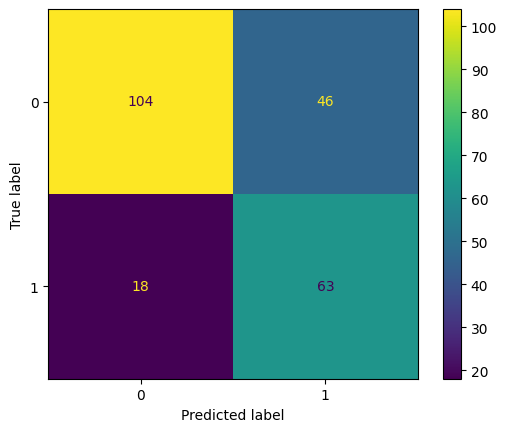

In [404]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

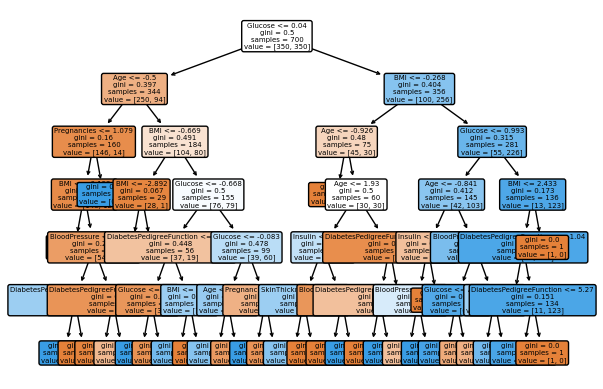

In [283]:
tree.plot_tree(model, feature_names = list(X.columns), filled = True,
               fontsize = 5, rounded = True)
plt.show()

In [413]:
def name_list(names):
    for name in names:
          comma_separated_names = ", ".join(names[:-2])
          last_two_names = " & ".join(names[-2:])
          return f"{comma_separated_names}, {last_two_names}"
names = ['bob', 'carl', 'murph', 'kristine', 'trey']
name_list(names)

'bob, carl, murph, kristine & trey'